# Notes:

Maybe normalize data? Look into it! Could standardized spectrum. Test!

Maybe change pLya to 9?

Get more spectra from any field for training purposes. Data.


http://ned.ipac.caltech.edu/level5/March19/Baron/Baron2.html

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # statistical data visualization

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [41]:
# Using this to be able to plot spectra. For some reason Jupyter won't let me plot spectra without this
%matplotlib inline

## Create our own labels:
    - Random empty spot as noise
    
## Use entire spectrum and not encoded.

* Extracted entire noise spectrum. 

* Combine the high confidence and noise array. Here are the labels for it. 

### Ultimately, we want the ML algorithm to be able to pick out high-z sources from noise!

In [23]:
# loading in the decoded sources I got from inputting random encoded sources into t-sne.
# These will be our testing sample
random_highz_sources = np.load("highz_sources.npy")

In [24]:
# loading in my high confidence high z sources.
high_confidence_highz_spectra = np.load("high_confidence_highz_10000.npy", allow_pickle = True)

In [25]:
# loading in the noise sample.
noise_sample = np.load("noise_sample_10000.npy", allow_pickle = True)

In [26]:
high_confidence_highz_spectra.shape

(10000, 1036)

In [27]:
noise_sample.shape

(10000, 1036)

In [28]:
from sklearn import preprocessing

In [29]:
normalized_highz = preprocessing.normalize(high_confidence_highz_spectra)

In [30]:
normalized_noise = preprocessing.normalize(noise_sample)

## Random-Forest classification

https://levelup.gitconnected.com/random-forest-regression-209c0f354c84#:~:text=Random%20Forest%20Regression%20is%20a%20supervised%20learning%20algorithm%20that%20uses,prediction%20than%20a%20single%20model.

https://www.datacamp.com/tutorial/random-forests-classifier-python

## According to internet, issues with overfitting! Possibly need more data.

https://stackoverflow.com/questions/62445343/randomforestregressor-in-sklearn-giving-negative-scores

In [31]:
#twodspectra = np.concatenate((high_confidence_highz_spectra, noise_sample))
twodspectra = np.concatenate((normalized_highz, normalized_noise))

In [32]:
highz_classification = np.ones(10000)
noise_classification = np.zeros(10000)

merge_classification = np.append(highz_classification, noise_classification)

### Make my own labels:
https://towardsdatascience.com/labeling-data-with-pandas-9e573ce59c42

In [33]:
X = twodspectra
y = merge_classification

In [34]:
# Splitting arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# i.e. 70 % training dataset and 30 % test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [35]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier

### Note on number of estimators/trees
- The more trees you have the more accurate the model will be, however it only helps a certain amount. I started with 100 estimators (and no changing of any parameters) and got an accuracy of around ~67-69%, I then increased to 500 estimators and got ~70-71% and then I went to 1000 estimators and it stayed the same as with 500 estimators. I even went to 10,000 and it stayed the same (might have even gone lower) as with 1000 estimators. Also takes awhile to run with 10,000. If anything 500 might have better accuracy.

In [46]:
# creating a RF classifier
rfc = RandomForestClassifier(n_estimators = 700)  

In [47]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=700)

In [48]:
# performing predictions on the test dataset
y_pred = rfc.predict(X_test)

In [49]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.73
Precision: 0.7868583162217659
Recall: 0.6350679482930063


In [18]:
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.8025


In [45]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = { 
    'n_estimators': [400, 500, 600, 700],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring = 'accuracy', cv= 5)
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_

# creating a RF classifier
rfc2 = RandomForestClassifier(n_estimators = 600, criterion = 'entropy', max_depth = 6, \
                              max_features = 'log2', random_state = 42)  

rfc2.fit(X_train, y_train)

y_pred = rfc2.predict(X_test)

In [24]:
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.7050691244239631


In [25]:
clf.predict(X_test[0].reshape(1, -1))

NameError: name 'clf' is not defined

In [26]:
clf.predict(X_test[1].reshape(1, -1))

NameError: name 'clf' is not defined

In [27]:
y_test[0]

0.0

In [28]:
y_test[1]

0.0

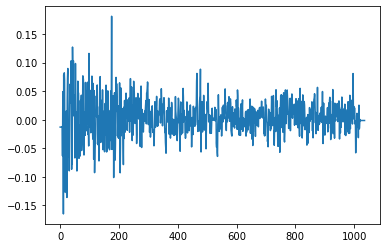

In [29]:
plt.plot(X_test[0])

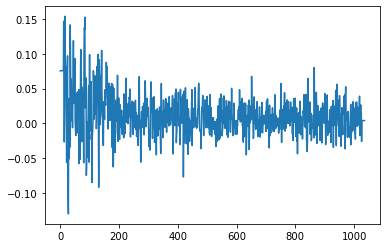

In [30]:
plt.plot(X_test[1])

Idk how much this would help but i recall that certain algorithms do better when the data is normalized. Maybe we can try implementing that and see how it does.
I think sklearn has some standard scaler that normalizes the data in a way to be used for ML purposes
white_check_mark
eyes
raised_hands





11:14
We can also look into the documentations and see what parameters we think has a big impact on the classification
11:15
and tweak those one at a time to see which has the biggest impact

In [31]:
from sklearn import tree
import dtreeviz # will be used for tree visualization

ModuleNotFoundError: No module named 'dtreeviz'

In [32]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf.estimators_[0], feature_names=X, filled=True)

NameError: name 'clf' is not defined

<Figure size 1440x1440 with 0 Axes>

In [33]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3)
rf.fit(X, y)

RandomForestClassifier(max_depth=3)

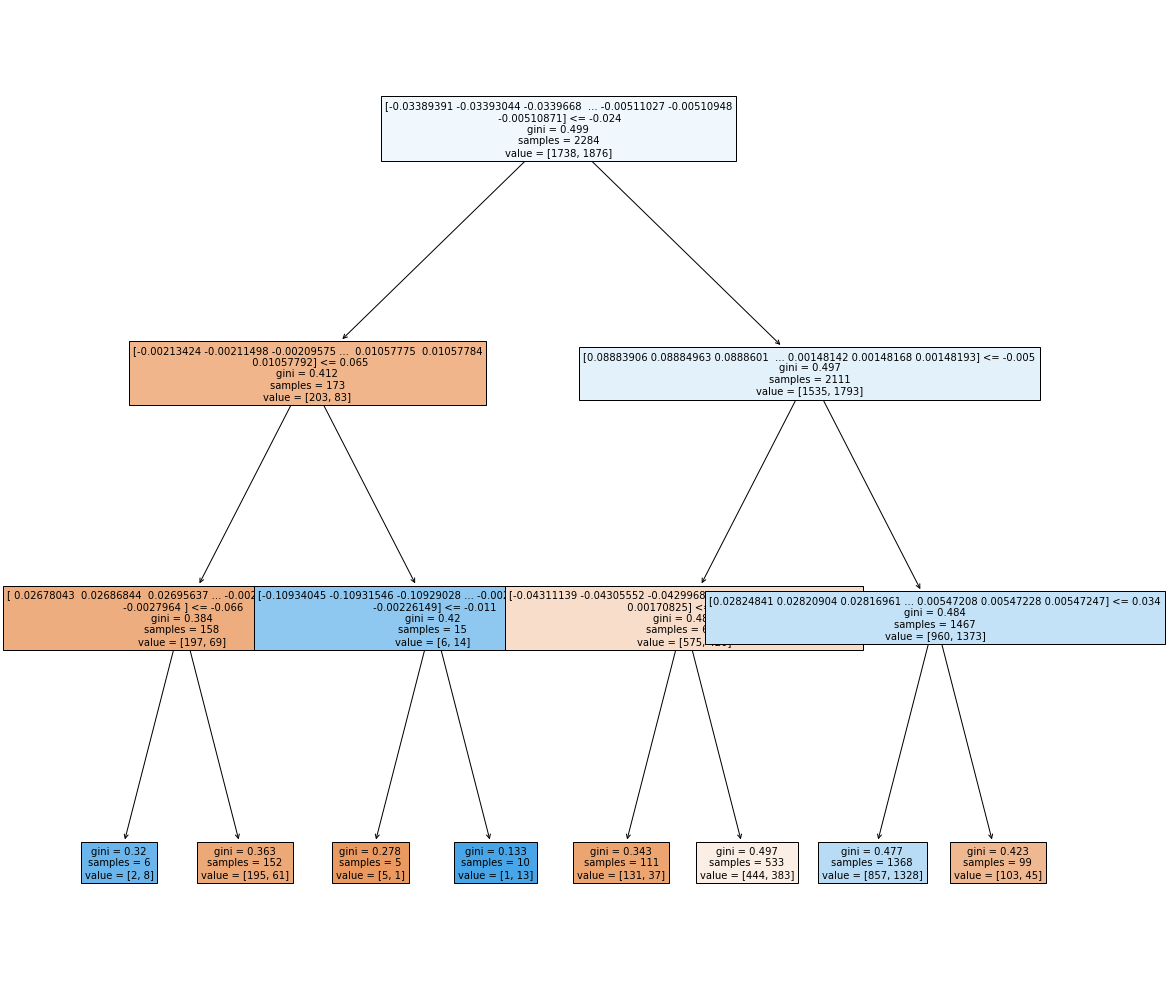

In [34]:
plt.figure(figsize=(18,18))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X, filled=True, fontsize = 10)

In [35]:
viz = dtreeviz.model(rf.estimators_[0], X, y, feature_names=X, target_name="Target")

NameError: name 'dtreeviz' is not defined

In [ ]:
viz.view() 

In [ ]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[0],
          class_names=["highz", "noise"], 
          filled=True, impurity=True, 
          rounded=True)

In [ ]:
plt.plot(X[42])

In [ ]:
plt.plot(X[984])

## Plotting
https://garg-mohit851.medium.com/random-forest-visualization-3f76cdf6456f 

https://builtin.com/data-science/random-forest-python-deep-dive

https://vitalflux.com/random-forest-classifier-python-code-example/

https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

#GRIDSEARCHCV
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# Different models

In [37]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.6857142857142857
Precision: 0.763855421686747
Recall: 0.5660714285714286


In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.5271889400921659
Precision: 0.5400340715502555
Recall: 0.5660714285714286


In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.6949308755760368
Precision: 0.7148217636022514
Recall: 0.6803571428571429


In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.6774193548387096
Precision: 0.7292576419213974
Recall: 0.5964285714285714


# Article for data prep
https://www.analyticsvidhya.com/blog/2021/06/4-ways-to-handle-insufficient-data-in-machine-learning/

### 03/01/23

https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114
https://www.keboola.com/blog/random-forest-regression#:~:text=If%20you%20want%20to%20increase,the%20maximum%20number%20of%20features.
https://www.kaggle.com/questions-and-answers/261231
https://www.kdnuggets.com/2018/12/feature-engineering-explained.html#:~:text=Feature%20Engineering%20Example%3A%20Continuous%20data,some%20object%20on%20the%20map.
https://www.analyticsvidhya.com/blog/2021/06/4-ways-to-handle-insufficient-data-in-machine-learning/
https://opg.optica.org/ol/fulltext.cfm?uri=ol-44-23-5864&id=423702
https://opg.optica.org/view_article.cfm?pdfKey=eb0ab124-2dbd-48bc-a1ae9c5771f8fea1_423702
https://www.nature.com/articles/s41467-021-21481-0
https://www.aanda.org/articles/aa/full_html/2016/07/aa28660-16/aa28660-16.html
https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501